In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('stress_levels.csv')

stress_map = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
df['stress_label']  = df['stress_level'].map(stress_map)
df['stress_binary'] = df['stress_label'].apply(lambda x: 1 if x == 2 else 0)   

In [3]:
feature_cols = [
    'total_unlocks', 'total_scr_time', 'avg_scr_time', 'night_unlocks',
    'total_convos', 'total_convo_time', 'avg_convo_time', 'night_convos',
    'total_dark', 'total_dark_time', 'avg_dark_time', 'night_dark'
]

df = df.dropna(subset=feature_cols + ['stress_binary'])   
X = df[feature_cols]
y = df['stress_binary']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=feature_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), 
                              columns=feature_cols, index=X_test.index)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',      
    random_state=42
)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['low/mod', 'high']))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

              precision    recall  f1-score   support

     low/mod       0.82      0.85      0.83       276
        high       0.51      0.45      0.48        97

    accuracy                           0.75       373
   macro avg       0.66      0.65      0.66       373
weighted avg       0.74      0.75      0.74       373

Accuracy: 0.745


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 98%|===================| 2927/2982 [00:13<00:00]        

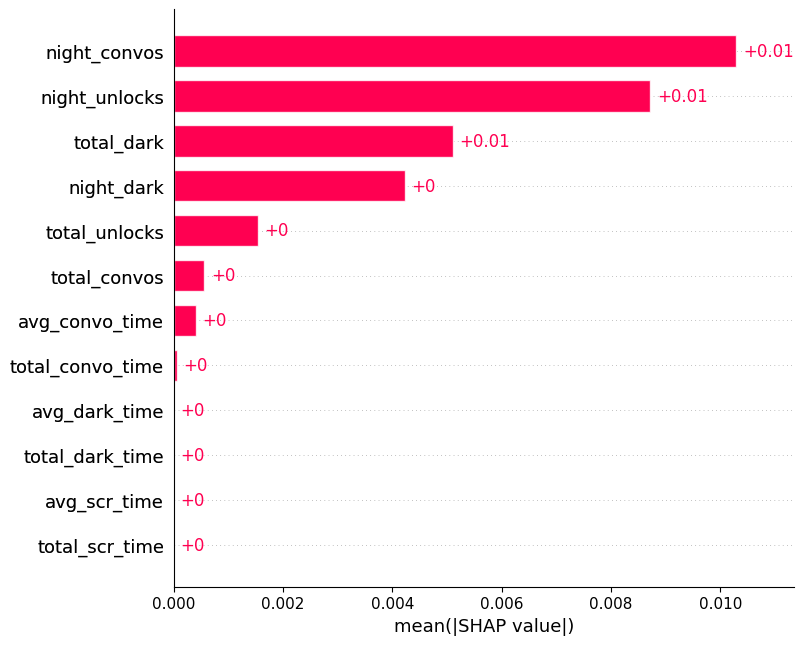

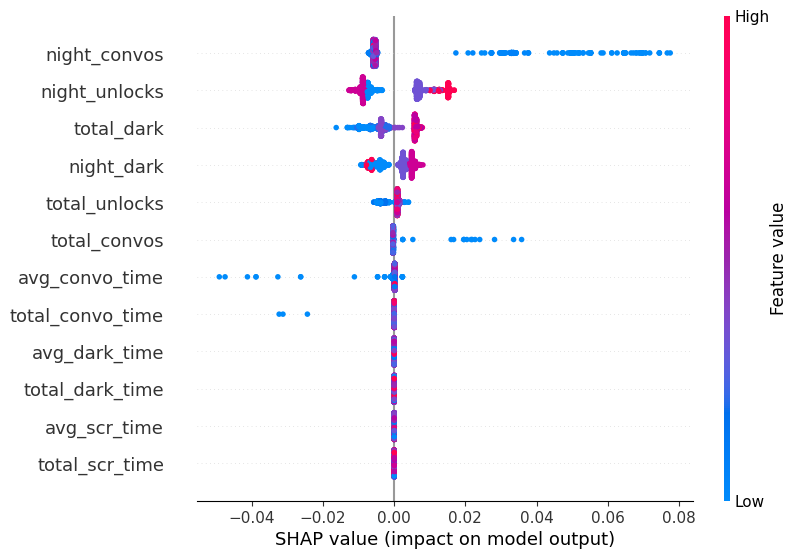

In [6]:
import shap

X_train = X_train.reset_index(drop=True)

explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap_class1 = shap_values[..., 1]

shap.plots.bar(shap_class1, max_display=15)
shap.plots.beeswarm(shap_class1, max_display=15)

In [7]:
selected_features = ['night_convos', 'night_unlocks', 'total_dark', 'night_dark', 'total_unlocks', 'total_convos', 'avg_convo_time']

df = df.dropna(subset=feature_cols + ['stress_binary'])   
X = df[selected_features]
y = df['stress_binary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',      
    random_state=42
)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['low/mod', 'high']))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

              precision    recall  f1-score   support

     low/mod       0.82      0.85      0.83       276
        high       0.51      0.45      0.48        97

    accuracy                           0.75       373
   macro avg       0.66      0.65      0.66       373
weighted avg       0.74      0.75      0.74       373

Accuracy: 0.745


In [9]:
import joblib
joblib.dump(clf, "stress_level_clf.pkl")

['stress_level_clf.pkl']